In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
# Save references to each table

Measure = Base.classes.measurement
Station = Base.classes.station
first_row = session.query(Measure).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2795c8d3d90>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last = session.query(Measure.date).order_by(Measure.date.desc()).first()
last

('2017-08-23',)

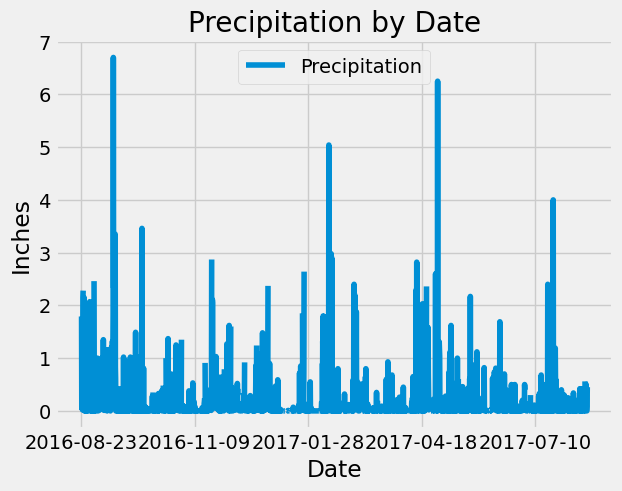

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year = session.query(Measure.date, Measure.prcp).\
    filter(Measure.date>=year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_rows = [{"Date": year[0], "Precipitation": year[1]} for year in one_year]
one_year_df = pd.DataFrame(one_year_rows).set_index("Date")

# Sort by date
one_year_df = one_year_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data

one_year_df.plot()
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
one_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2795c958580>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_list = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).\
    order_by(func.count(Measure.station).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_id = session.query(func.min(Measure.tobs), func.max(Measure.tobs), func.avg(Measure.tobs)).\
    filter(Measure.station=="USC00519281").all()
active_id

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

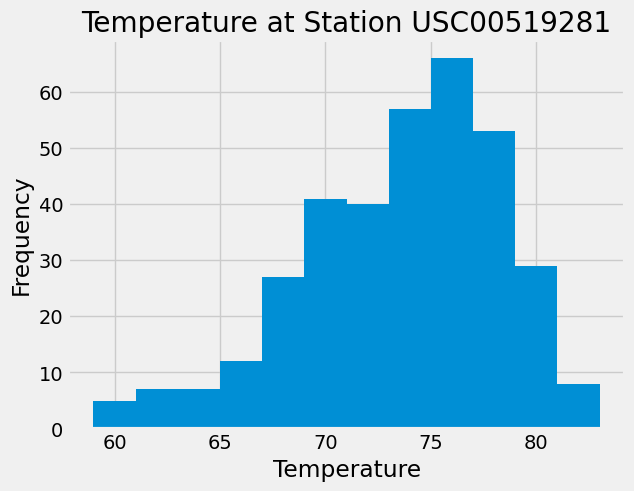

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Build query
twelve_months = session.query(Measure.tobs).\
    filter(Measure.date>=year_ago).\
    filter(Measure.station=="USC00519281").all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
twelve_months_rows = [{"Temperature": temp[0]} for temp in twelve_months]
twelve_months_df = pd.DataFrame(twelve_months_rows)

# Plot the histogram
twelve_months_df.hist(column="Temperature", bins = 12)
plt.title("Temperature at Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show

# Close Session

In [17]:
# Close Session
session.close()